In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/My Drive/UFO_Sitings.csv",low_memory=False)

In [ ]:
df=pd.read_csv("UFO_Sitings.csv",low_memory=False)

In [ ]:
df.head(5)

datetime                  city  ...    latitude  longitude 
0  10/10/1949 20:30            san marcos  ...  29.8830556  -97.941111
1  10/10/1949 21:00          lackland afb  ...    29.38421  -98.581082
2  10/10/1955 17:00  chester (uk/england)  ...        53.2   -2.916667
3  10/10/1956 21:00                  edna  ...  28.9783333  -96.645833
4  10/10/1960 20:00               kaneohe  ...  21.4180556 -157.803611

[5 rows x 11 columns]

In [ ]:
df.describe

<bound method NDFrame.describe of                datetime                  city  ...    latitude  longitude 
0      10/10/1949 20:30            san marcos  ...  29.8830556  -97.941111
1      10/10/1949 21:00          lackland afb  ...    29.38421  -98.581082
2      10/10/1955 17:00  chester (uk/england)  ...        53.2   -2.916667
3      10/10/1956 21:00                  edna  ...  28.9783333  -96.645833
4      10/10/1960 20:00               kaneohe  ...  21.4180556 -157.803611
...                 ...                   ...  ...         ...         ...
80327    9/9/2013 21:15             nashville  ...  36.1658333  -86.784444
80328    9/9/2013 22:00                 boise  ...  43.6136111 -116.202500
80329    9/9/2013 22:00                  napa  ...  38.2972222 -122.284444
80330    9/9/2013 22:20                vienna  ...  38.9011111  -77.265556
80331    9/9/2013 23:00                edmond  ...  35.6527778  -97.477778

[80332 rows x 11 columns]>

In [ ]:
df.shape

(80332, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [ ]:
null_vals = df.isnull().sum()
nul_per = (null_vals / len(df))*100
print(' Null Values (% of columns):')
print(round(nul_per.sort_values(ascending=False),2))

 Null Values (% of columns):
country                 12.04
state                    7.22
shape                    2.41
comments                 0.02
longitude                0.00
latitude                 0.00
date posted              0.00
duration (hours/min)     0.00
duration (seconds)       0.00
city                     0.00
datetime                 0.00
dtype: float64


In [5]:

ufo_df=pd.read_csv("/content/drive/My Drive/UFO_Sitings.csv",low_memory=False,na_values = ['UNKNOWN','UNK'],na_filter = True, skip_blank_lines = True) 

In [ ]:
df=pd.read_csv("UFO_Sitings.csv",low_memory=False,na_values = ['UNKNOWN','UNK'],na_filter = True, skip_blank_lines = True)

In [6]:
ufo_df.drop('duration (hours/min)', axis=1, inplace=True)

In [7]:
#We drop the rwos with null values with threshold 8
ufo_df = ufo_df.dropna(thresh=8)
ufo_df = ufo_df.reset_index(drop=True)


In [8]:
ufo_df.rename(columns={'country':'Country','state':'State','shape':'Shape_of_UFO','comments':'Description_of_UFO','longitude ':'Longitude','latitude':'Latitude','duration (seconds)':'Duration(in secs)', 'city':'City', 'datetime':'DateTime','date posted':'DatePosted'}, inplace=True)

In [9]:
ufo_df.head(5)

DateTime                  City  ...    Latitude   Longitude
0  10/10/1949 20:30            san marcos  ...  29.8830556  -97.941111
1  10/10/1949 21:00          lackland afb  ...    29.38421  -98.581082
2  10/10/1955 17:00  chester (uk/england)  ...        53.2   -2.916667
3  10/10/1956 21:00                  edna  ...  28.9783333  -96.645833
4  10/10/1960 20:00               kaneohe  ...  21.4180556 -157.803611

[5 rows x 10 columns]

In [10]:
ufo_df.shape

(80257, 10)

In [11]:
ufo_df['DateTime'] = ufo_df.DateTime.str.replace('24:00', '00:00')
ufo_df['DateTime'] = pd.to_datetime(ufo_df['DateTime'], format='%m/%d/%Y %H:%M')

In [12]:
ufo_df['Latitude'] = pd.to_numeric(ufo_df['Latitude'],errors = 'coerce')  
ufo_df['Longitude'] = pd.to_numeric(ufo_df['Longitude'], errors='coerce')

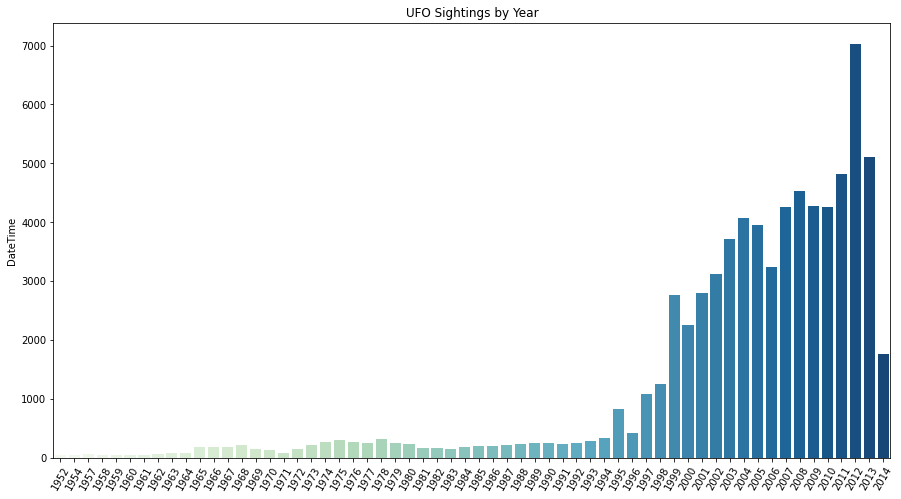

In [13]:
#Bar plot for years and no. of UFO Sightings
ufo_yr = ufo_df['DateTime'].dt.year 
years_data = ufo_yr.value_counts()
years_index = years_data.index  
years_values = years_data[1:]



## Create Bar Plot ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')

years_plot = sns.barplot(x=years_index[:60],y=years_values[:60], palette = "GnBu")

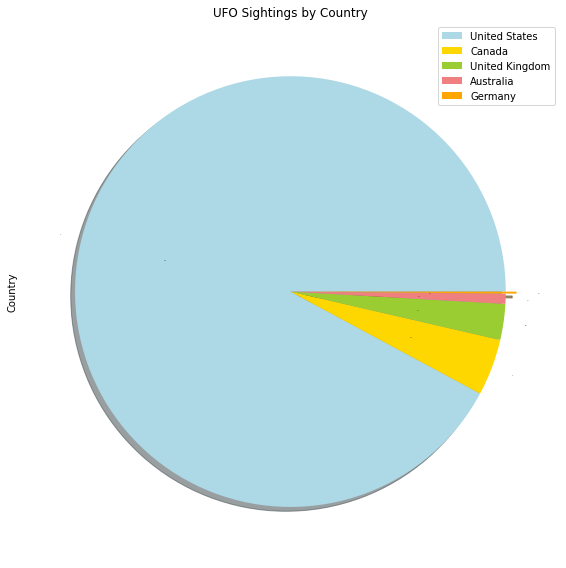

In [ ]:
country_sightings = ufo_df.Country.value_counts()  # num ufo sightings per country 

explode = (0, 0, 0, 0., 0.05)
colors = ['lightblue','gold','yellowgreen','lightcoral','orange']
country_sightings.plot(kind = 'pie', fontsize = 0, title='UFO Sightings by Country', colors=colors,
                       autopct='%1.1f%%',shadow=True, explode=explode,figsize=(8,8))
plt.legend(labels=['United States','Canada','United Kingdom','Australia','Germany'], loc="best")
plt.tight_layout()

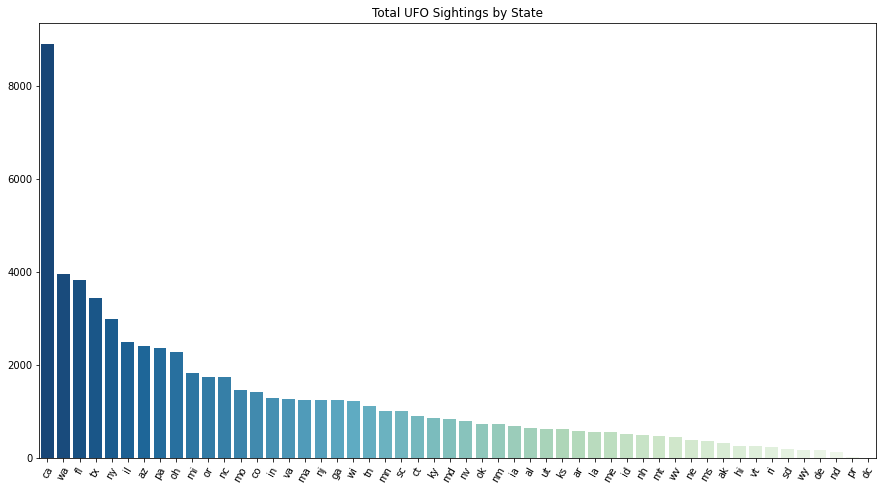

Top 10 States for Total UFO Sightings:
ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
il    2499
az    2414
pa    2366
oh    2275
mi    1836
Name: State, dtype: int64


In [ ]:
usa_filter = ufo_df['Country']=='us'  # filter non-usa country
us_data = ufo_df[usa_filter]  # DF ufo_data of only US sightings - includes puerto rico and dc

# Get x and y axes for states bar viz #
states_sights = us_data.State.value_counts()  # State Data
state_names = states_sights.index  # x axis ticks
states_sights_dict=dict(states_sights)
state_freq = list(states_sights_dict.values())  # y axis values

# States Frequency Pareto Chart #
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Total UFO Sightings by State')
states_plot = sns.barplot(x=state_names,y=state_freq, palette="GnBu_r")
plt.show()
print('Top 10 States for Total UFO Sightings:')
print(states_sights[:10].sort_values(ascending=False))

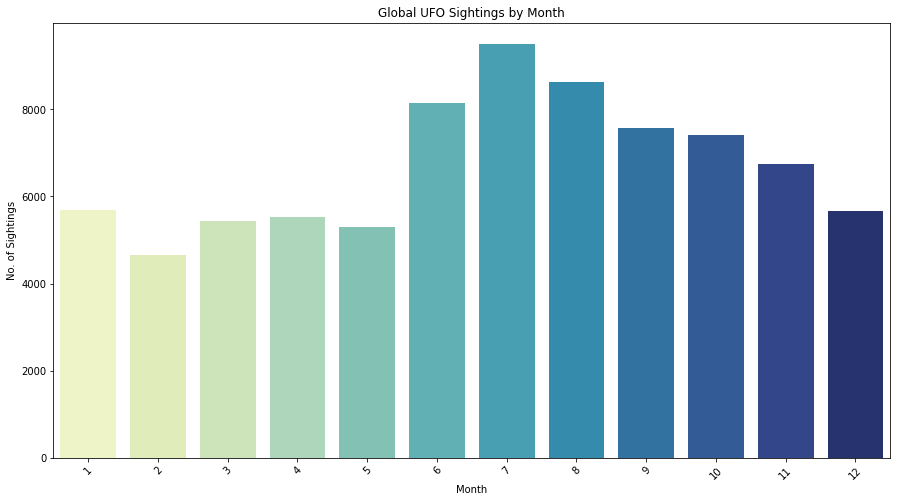

In [ ]:
#Global UFO Sightings by Month
m_cts = (ufo_df['DateTime'].dt.month.value_counts()).sort_index()
m_cts_dict=dict(m_cts)
m_ctsx = m_cts.index
m_ctsy = list(m_cts_dict.values())
f, ax = plt.subplots(figsize=(15,8))

sns.barplot(x=m_ctsx, y=m_ctsy, palette="YlGnBu")
ax.set_title('Global UFO Sightings by Month')
ax.set_xlabel('Month')
ax.set_ylabel('No. of Sightings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
ufo_date=ufo_df['DateTime']
# Add Season Column to ufo_date #
# Given a datetime, return the season that it's in #
ufo_datem = ufo_date.dt.month
spring = range(5,7)
summer = range(7,10)
fall = range(10,12)
seasons = []

for st_date in ufo_datem:
    # Conversion Process # 
    if st_date in spring:
      seasons.append('Spring')
    elif st_date in summer:
        seasons.append('Summer')
    elif st_date in fall:
        seasons.append('Fall')
    else:
        seasons.append('Winter')
ufo_df['Season'] = pd.Series(seasons, index=ufo_df.index)

In [ ]:
# Add Hemisphere Column to ufo_date #
hemis = []
for st_loc in ufo_df['Latitude']:
    if st_loc >= 0 :
        hemis.append('Northern Hemisphere')
    else:
        hemis.append('Southern Hemisphere')
ufo_df['Hemisphere'] = (pd.Series(hemis, index=ufo_df.index)).astype('category')

In [ ]:
ufo_df.tail(5)

DateTime       City  ...  Season           Hemisphere
80252 2013-09-09 21:15:00  nashville  ...  Summer  Northern Hemisphere
80253 2013-09-09 22:00:00      boise  ...  Summer  Northern Hemisphere
80254 2013-09-09 22:00:00       napa  ...  Summer  Northern Hemisphere
80255 2013-09-09 22:20:00     vienna  ...  Summer  Northern Hemisphere
80256 2013-09-09 23:00:00     edmond  ...  Summer  Northern Hemisphere

[5 rows x 12 columns]

In [ ]:
ufo_df['Season'].value_counts()

Winter    26971
Summer    25719
Fall      14142
Spring    13425
Name: Season, dtype: int64

In [ ]:
north= ufo_df[ufo_df['Hemisphere'] == 'Northern Hemisphere']
south = ufo_df[ufo_df['Hemisphere'] == 'Southern Hemisphere']

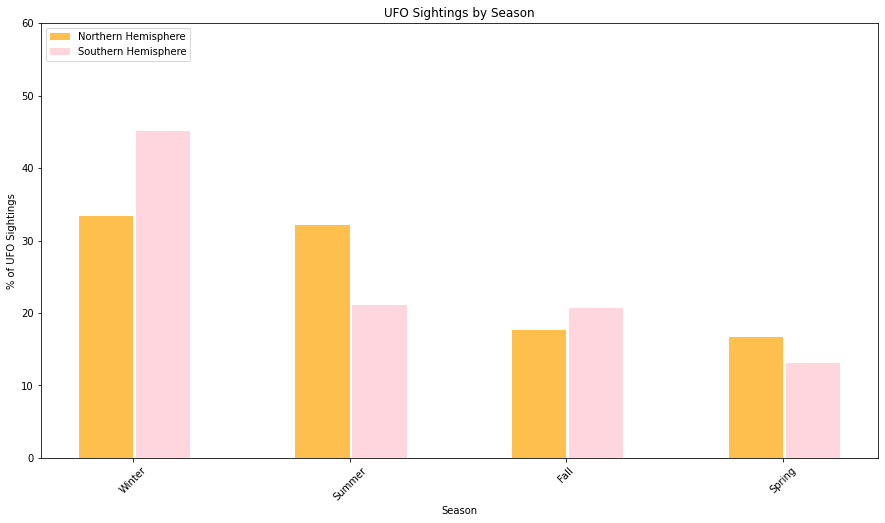

Northern Hemisphere:
 Winter    33.449099
Summer    32.200093
Fall      17.683089
Spring    16.667719
Name: Season, dtype: float64
Southern Hemisphere:
 Winter    45.158287
Spring    21.135940
Summer    20.670391
Fall      13.035382
Name: Season, dtype: float64


In [ ]:
#Sightings per season in northern and southern hemisphere
nh_per = north['Season'].value_counts() / len(north) * 100
sh_per = south['Season'].value_counts() / len(south) * 100

pos = list(range(len(nh_per)))
width = 0.25
fig, ax = plt.subplots(figsize = (15,8))

plt.bar(pos, nh_per, width, alpha = .7, color='orange')
plt.bar([p + width*1.05 for p in pos], sh_per, width, alpha = .65, color='pink')

ax.set_title('UFO Sightings by Season')
ax.set_xlabel('Season')
ax.set_ylabel('% of UFO Sightings')
ax.set_xticks([p + .5 * width for p in pos])
ax.set_xticklabels(nh_per.index)
plt.xticks(rotation=45)

plt.ylim([0, 60])
plt.legend(['Northern Hemisphere','Southern Hemisphere'], loc='upper left')
plt.show()
print('Northern Hemisphere:\n', nh_per)
print('Southern Hemisphere:\n',sh_per)

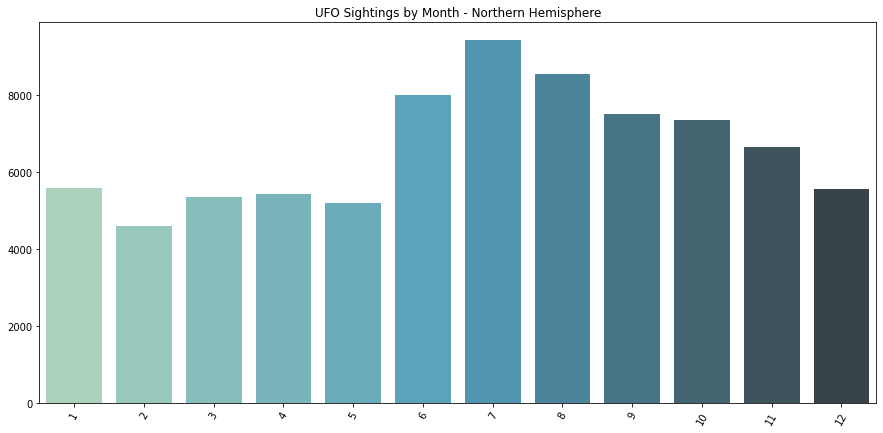

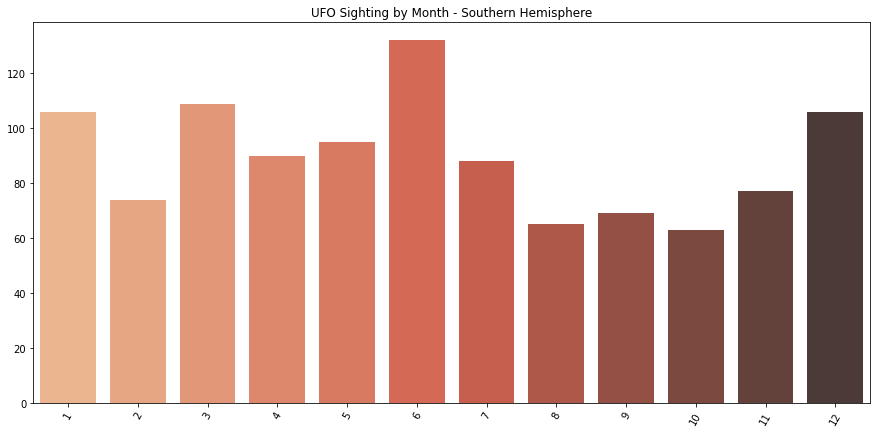

Top Months for UFO Sightings in N. Hemishpere:
7     9424
8     8562
6     8004
9     7511
10    7343
11    6659
Name: DateTime, dtype: int64
Top Months for UFO Sightings in S. Hemisphere:
6     132
3     109
12    106
1     106
5      95
4      90
Name: DateTime, dtype: int64


In [ ]:
n_month = north['DateTime'].dt.month
s_month = south['DateTime'].dt.month
# N.MONTH #
Nmonth_cts = n_month.value_counts().sort_index()
Nmonth_in = Nmonth_cts.index 
Nmonth_val = list(dict(Nmonth_cts).values())

# S.MONTH #
Smonth_cts = s_month.value_counts().sort_index()
Smonth_in = Smonth_cts.index
Smonth_val = list(dict(Smonth_cts).values())

plt.figure(figsize=(15,7))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Month - Northern Hemisphere')
sns.barplot(x=Nmonth_in,y=Nmonth_val, palette="GnBu_d")
plt.show()

plt.figure(figsize=(15,7))
plt.xticks(rotation = 60)
plt.title('UFO Sighting by Month - Southern Hemisphere')
sns.barplot(x=Smonth_in, y=Smonth_val, palette="OrRd_d")
plt.show()

print('Top Months for UFO Sightings in N. Hemishpere:')
print(n_month.value_counts()[:6])
print('Top Months for UFO Sightings in S. Hemisphere:')
print(s_month.value_counts()[:6])

In [ ]:
#Frequency of Shapes of UFO
ufo_df["Shape_of_UFO"].value_counts()

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
crescent         2
round            2
dome             1
pyramid          1
changed          1
flare            1
hexagon          1
Name: Shape_of_UFO, dtype: int64

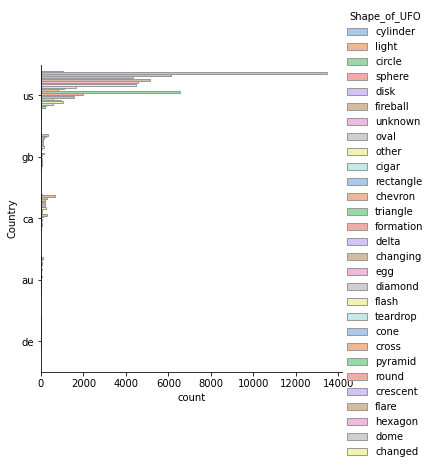

In [ ]:
sns.catplot(y="Country", hue="Shape_of_UFO", kind="count",
            palette="pastel", edgecolor=".6",
            data=ufo_df)

In [ ]:
#Scatter plot relating Duration, Shape and Country
fig = px.scatter(ufo_df,x='Shape_of_UFO', y='Duration(in secs)',hover_name='Country',hover_data=['DateTime'])
fig.show()

In [ ]:
# Linear Regression Model

In [194]:
#Preparing the data
ufo_data=ufo_df[(ufo_df['DateTime'] >= '1995-01-01') & (ufo_df['DateTime'] <= '2015-01-01')]
ufo_yr=ufo_data['DateTime'].dt.year
years_data = ufo_yr.value_counts()
years_data=years_data.to_frame()
years_data=years_data.sort_index(ascending=True)
years_data


DateTime
1995      1077
1996       833
1997      1254
1998      1766
1999      2804
2000      2767
2001      3113
2002      3231
2003      3956
2004      4254
2005      4080
2006      3716
2007      4264
2008      4818
2009      4537
2010      4281
2011      5106
2012      7354
2013      7035
2014      2259

In [195]:
#Computing Lag=1 data
years_data['Lag_1'] = years_data.iloc[:,0].shift(1)
years_data


DateTime   Lag_1
1995      1077     NaN
1996       833  1077.0
1997      1254   833.0
1998      1766  1254.0
1999      2804  1766.0
2000      2767  2804.0
2001      3113  2767.0
2002      3231  3113.0
2003      3956  3231.0
2004      4254  3956.0
2005      4080  4254.0
2006      3716  4080.0
2007      4264  3716.0
2008      4818  4264.0
2009      4537  4818.0
2010      4281  4537.0
2011      5106  4281.0
2012      7354  5106.0
2013      7035  7354.0
2014      2259  7035.0

In [196]:
x_train= [years_data.iloc[1:,1]]
y_train = [years_data.iloc[1:,0]] 



In [197]:
lr=LinearRegression()

In [198]:
#Training the model
lr.fit(x_train,y_train)

LinearRegression()

In [201]:
x_test=[np.arange(19)]
x_test

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18])]

In [202]:
#Forecasting values
y_pred=lr.predict(x_test)
y_pred

array([[ 833., 1254., 1766., 2804., 2767., 3113., 3231., 3956., 4254.,
        4080., 3716., 4264., 4818., 4537., 4281., 5106., 7354., 7035.,
        2259.]])